In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fashion_train_df = pd.read_csv('Downloads/fashion-mnist_train.csv', sep=',')

In [3]:
fashion_test_df = pd.read_csv('Downloads/fashion-mnist_test.csv', sep=',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
training = np.array(fashion_train_df, dtype = 'float32')

In [10]:
testing = np.array(fashion_test_df, dtype = 'float32')

6.0

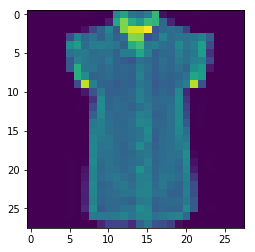

In [23]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

In [ ]:
#0 	T-shirt/top
#1 	Trouser
#2 	Pullover
#3 	Dress
#4 	Coat
#5 	Sandal
#6 	Shirt
#7 	Sneaker
#8 	Bag
#9 	Ankle boot

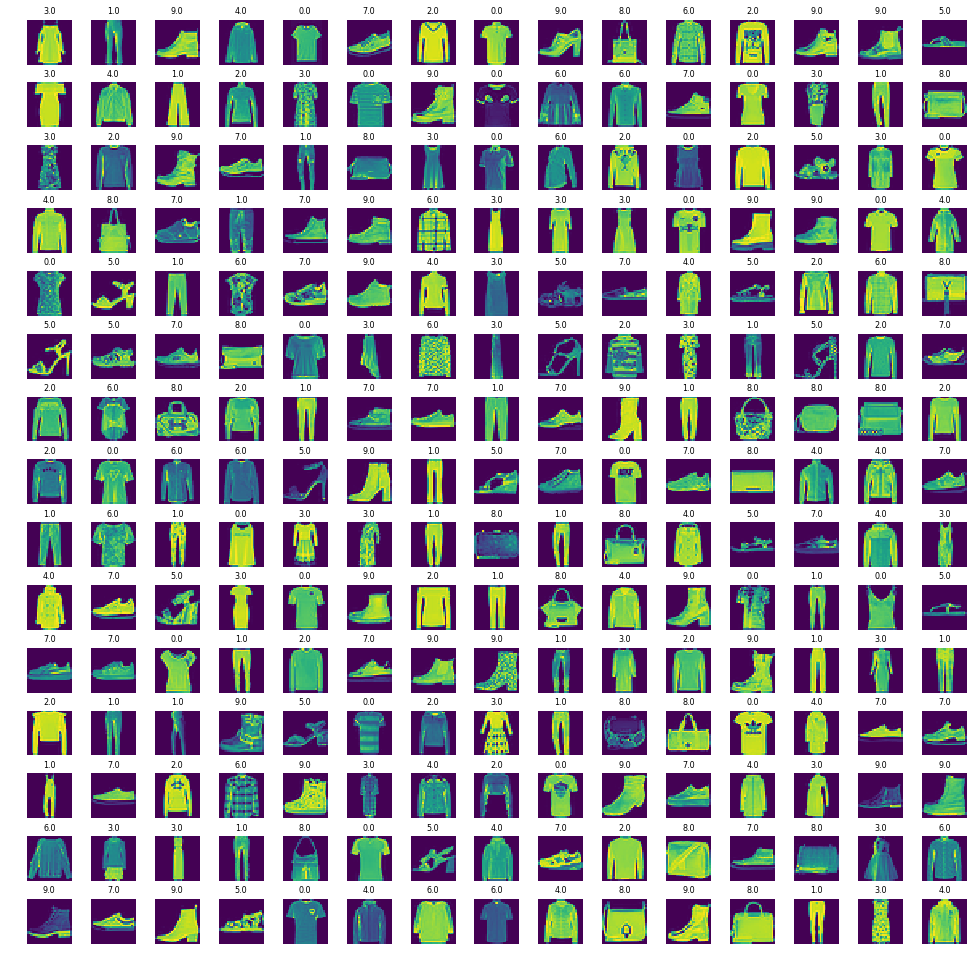

In [27]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [28]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [29]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345
                                                           )

In [32]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [33]:
X_train.shape

(48000, 28, 28, 1)

In [34]:
import keras

Using TensorFlow backend.


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [36]:
cnn_model = Sequential()

In [37]:
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


/home/pekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [39]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [40]:
cnn_model.add(Flatten())

In [41]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/home/pekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [42]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/home/pekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [44]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [62]:
epochs = 20

In [63]:
cnn_model.fit(X_train,
             y_train,
             batch_size = 512,
              nb_epoch = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

/home/pekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 230s 5ms/step - loss: 0.3323 - acc: 0.8837 - val_loss: 0.3304 - val_acc: 0.8821
Epoch 2/20
48000/48000 [==============================] - 236s 5ms/step - loss: 0.3150 - acc: 0.8887 - val_loss: 0.3169 - val_acc: 0.8874
Epoch 3/20
48000/48000 [==============================] - 234s 5ms/step - loss: 0.3033 - acc: 0.8932 - val_loss: 0.3077 - val_acc: 0.8921
Epoch 4/20
48000/48000 [==============================] - 233s 5ms/step - loss: 0.2931 - acc: 0.8970 - val_loss: 0.3006 - val_acc: 0.8939
Epoch 5/20
48000/48000 [==============================] - 234s 5ms/step - loss: 0.2821 - acc: 0.9008 - val_loss: 0.2982 - val_acc: 0.8922
Epoch 6/20
48000/48000 [==============================] - 237s 5ms/step - loss: 0.2746 - acc: 0.9035 - val_loss: 0.2945 - val_acc: 0.8944
Epoch 7/20
48000/48000 [==============================] - 233s 5ms/step - loss: 0.2675 - acc: 0.9067 - val_loss: 0.2886 - 

In [64]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 43s 4ms/step
Test Accuracy : 0.910


In [65]:
predicted_classes = cnn_model.predict_classes(X_test)

In [66]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1])

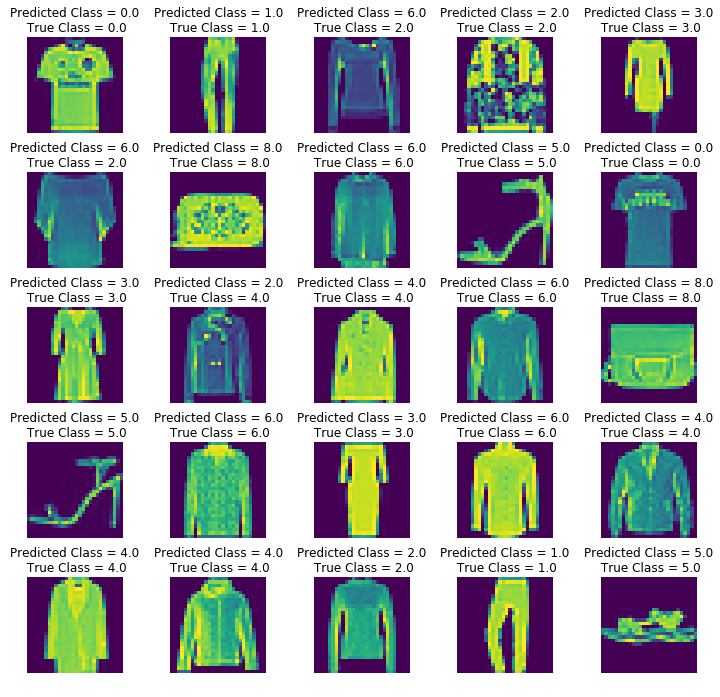

In [72]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

In [68]:
#0 	T-shirt/top
#1 	Trouser
#2 	Pullover
#3 	Dress
#4 	Coat
#5 	Sandal
#6 	Shirt
#7 	Sneaker
#8 	Bag
#9 	Ankle boot

Text(219.58333333333331, 0.5, 'Actual class')

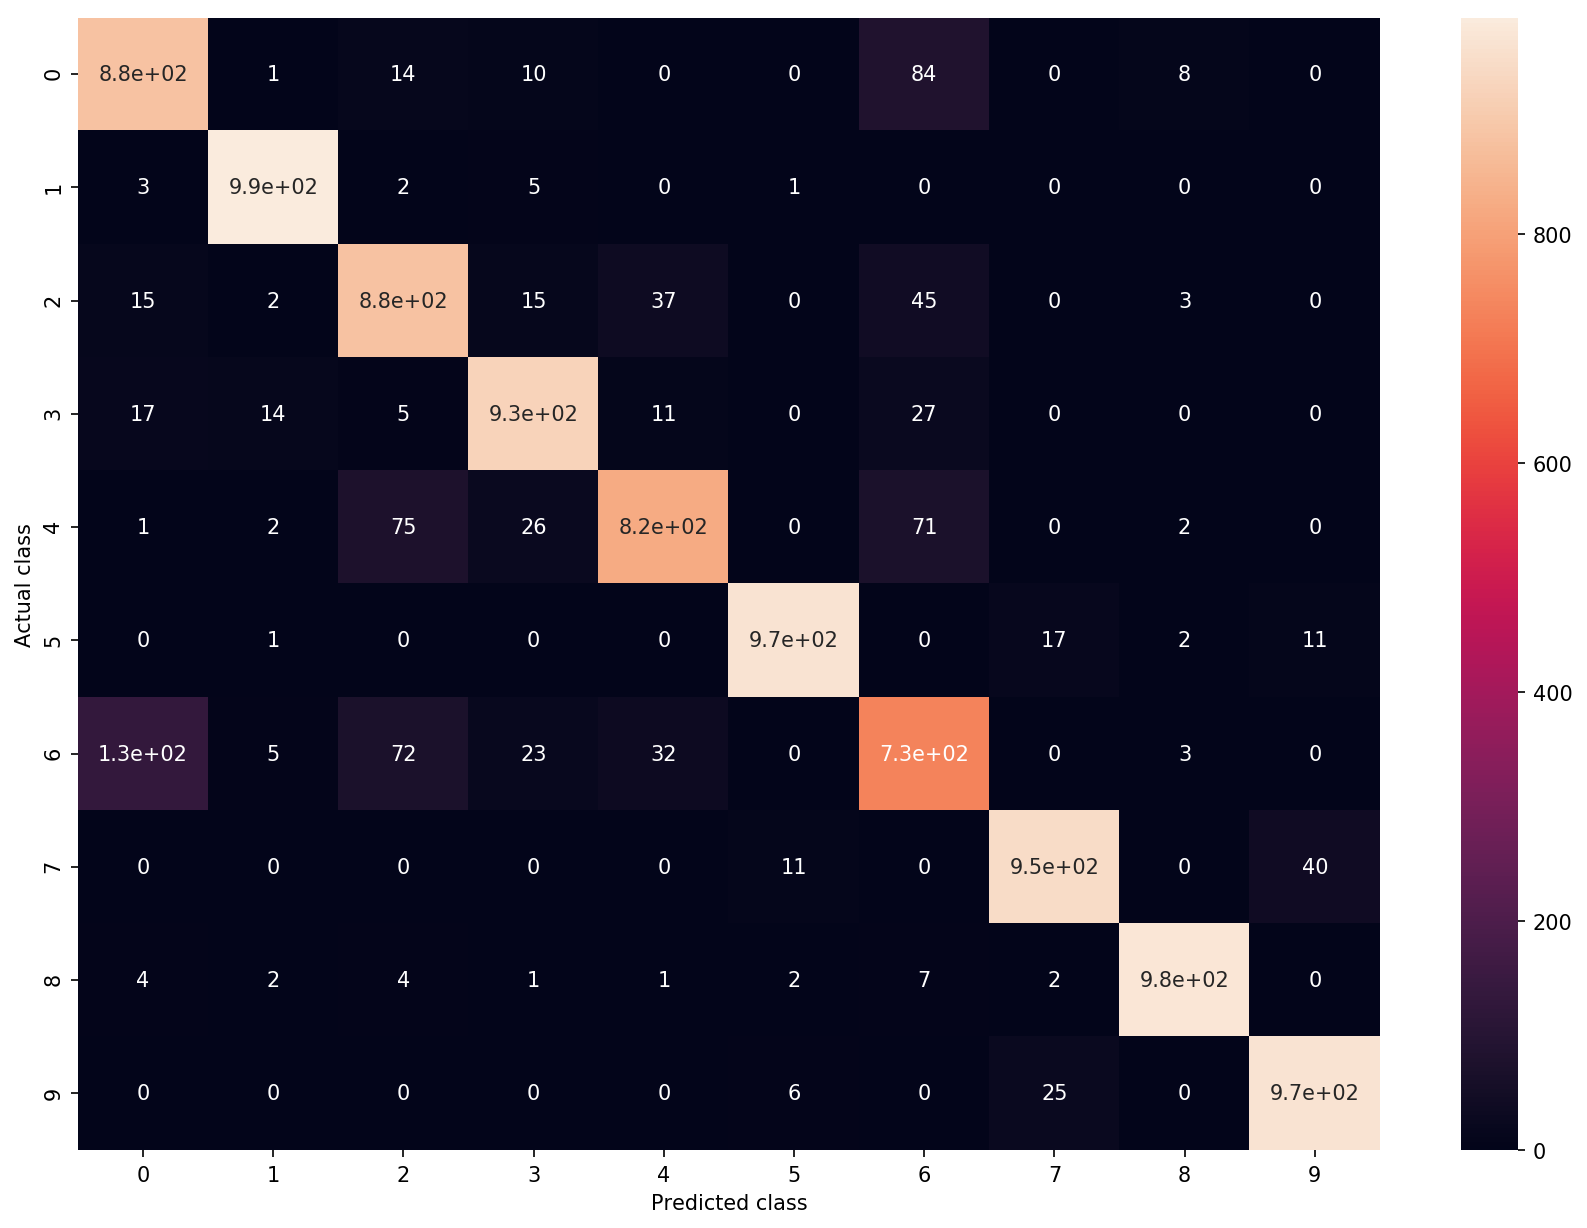

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10), dpi=150)
ax = plt.axes()
sns.heatmap(cm, annot = True)
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")

In [70]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      1000
     Class 1       0.97      0.99      0.98      1000
     Class 2       0.84      0.88      0.86      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.91      0.82      0.86      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.76      0.73      0.74      1000
     Class 7       0.96      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

